In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timezone, timedelta
from io import StringIO
import geohash2
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")
import import_ipynb
import pm25_nowcast_aqi as aqi

importing Jupyter notebook from pm25_nowcast_aqi.ipynb
PM25: 35.9 AQI: 102


## Extraction - PM25 Last 24 Hours

In [2]:
# Kedro Catalog
pm25_last_hour = catalog.load('pm25_last_hour')
# Data Frame Sensors
pm25_last_hour.head()

2022-09-21 23:18:41,354 - kedro.io.data_catalog - INFO - Loading data from `pm25_last_hour` (CSVDataSet)...


,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-20T23:59:30-05:00,6.512605,6.112069,6.282051,6.743590,5.678261,6.336207,9.700855,0.487179,3.000000,0.614035,6.709402,1.247863,7.155172
1,2022-09-21T00:59:30-05:00,8.698276,7.344538,7.203390,8.831933,4.666667,5.731092,8.086207,0.457627,0.678571,0.525424,8.572650,1.067227,7.109244
2,2022-09-21T01:59:30-05:00,7.350000,8.869048,5.864407,7.818966,4.474576,5.230769,6.846154,0.075000,4.552632,4.225000,11.808333,3.308333,9.504202
3,2022-09-21T02:59:30-05:00,5.991597,7.127119,6.440678,7.529412,5.059829,4.572650,5.711864,0.210084,1.469027,0.872881,10.358974,1.313559,5.601695
4,2022-09-21T03:59:30-05:00,5.808333,7.982456,6.567797,7.855932,3.677966,4.456140,5.361345,0.092437,1.771930,1.608333,20.600000,2.058333,5.403361


In [3]:
# Check Data Types
pm25_last_hour.dtypes

DATETIME         object
TANGARA_2BBA    float64
TANGARA_14D6    float64
TANGARA_1CE2    float64
TANGARA_1FCA    float64
TANGARA_2492    float64
TANGARA_2FF6    float64
TANGARA_48C6    float64
TANGARA_4D7A    float64
TANGARA_532E    float64
TANGARA_EA06    float64
TANGARA_F1AE    float64
TANGARA_FAC6    float64
TANGARA_06BE    float64
dtype: object

## Descriptive Statistics

In [4]:
# Describe Data
pm25_last_hour.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,18.000000,24.000000,24.000000,24.000000,21.000000,24.000000
mean,10.605600,9.504180,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.618200,17.183352,8.781838,12.679593
std,4.047581,2.286113,2.494554,2.832977,4.040994,4.281738,5.088223,1.523418,4.756257,11.549010,5.391263,6.436804,5.429801
min,5.808333,6.112069,5.144068,6.743590,3.616071,4.221239,5.361345,0.060345,0.678571,0.525424,6.709402,1.067227,4.863248
25%,8.360609,7.886415,6.539883,8.691176,5.602713,6.184928,8.232078,0.420929,3.107143,4.283141,14.316810,3.308333,8.916944
50%,9.243133,9.358345,8.062593,11.574875,10.891908,10.812781,9.733036,1.833686,9.588054,20.024894,16.039186,6.125000,12.378318
75%,11.487500,10.430929,10.116906,12.819666,12.153424,12.856838,11.811995,3.142921,11.634084,24.839161,20.603017,14.516949,17.013513
max,20.000000,14.769231,14.000000,17.753846,16.763158,18.774775,23.440000,3.775000,15.350877,33.558333,28.305085,18.924370,24.409091


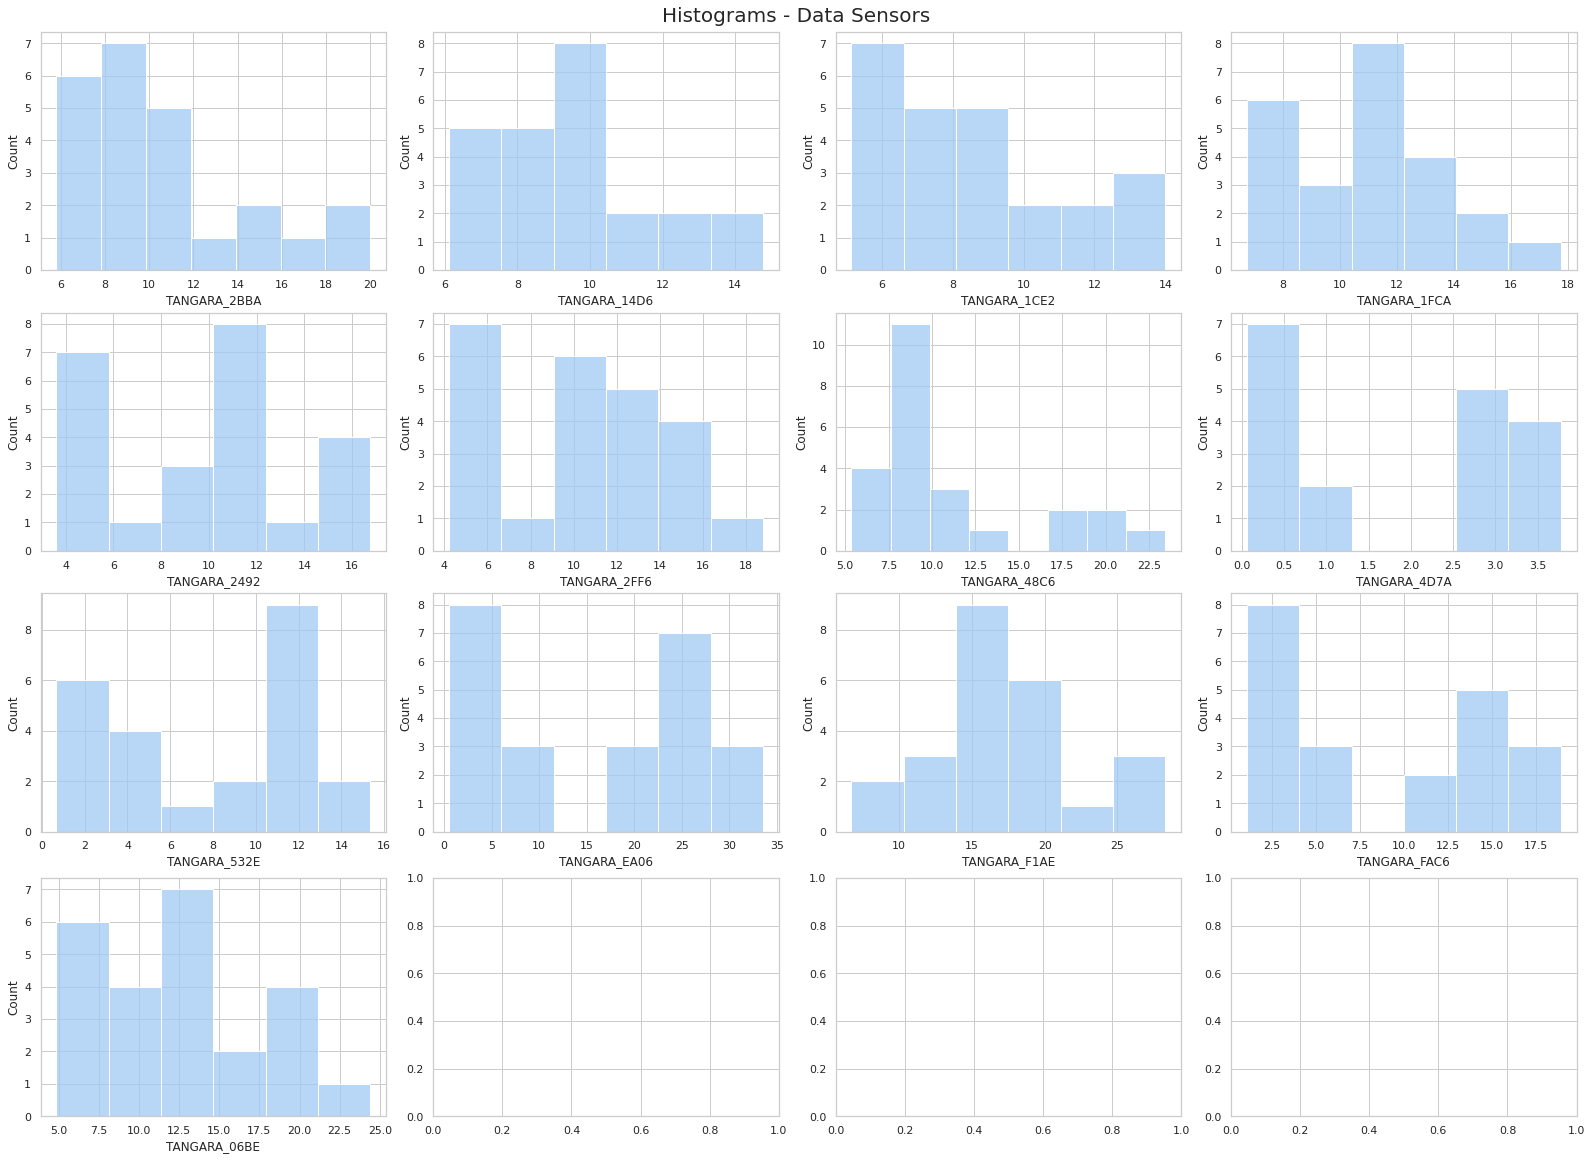

In [5]:
# Plot Histograms
aqi.histplots(pm25_last_hour)

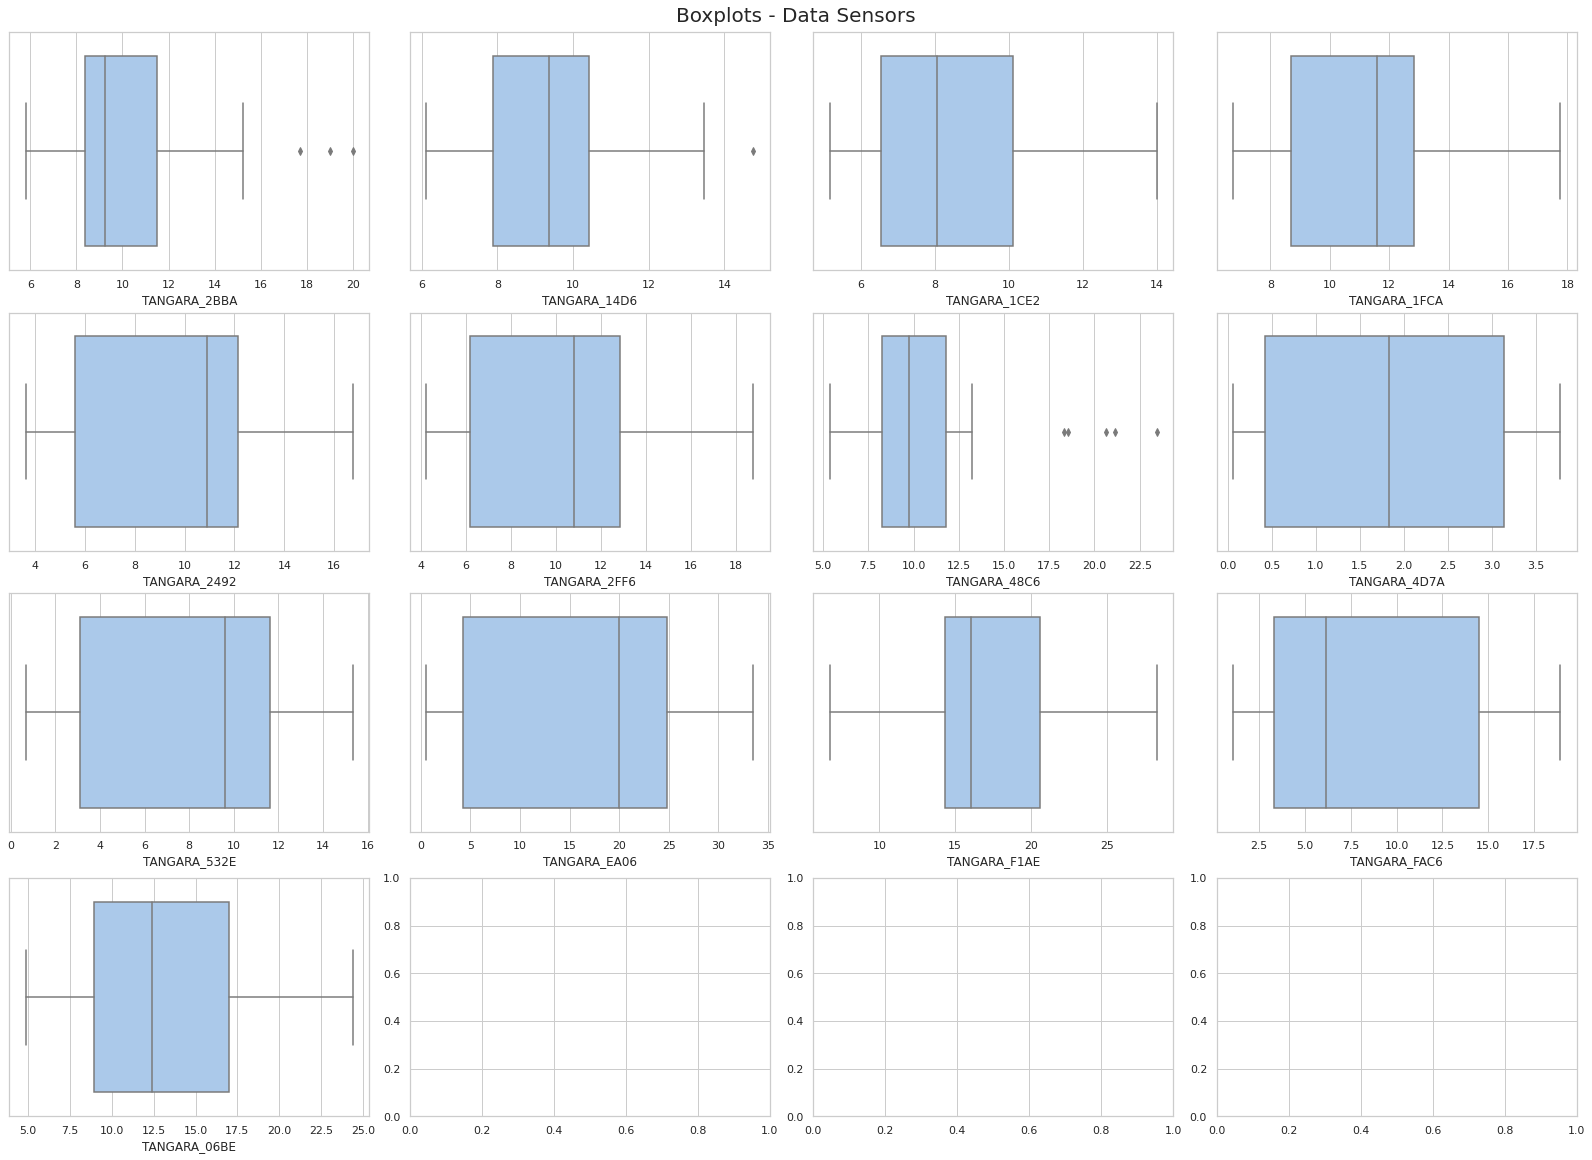

In [6]:
# Plot Boxplots
aqi.boxplots(pm25_last_hour)

In [7]:
# Get pm25 resample mean last 24 hours
def resample_pm25_last_24h(data_sensors):
    # Timestamp Format
    data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
    data_sensors = data_sensors.resample('24H', on='DATETIME', origin='end').mean().reset_index()#.median().reset_index()
    data_sensors['DATETIME'] = data_sensors['DATETIME'].apply(lambda x: x.isoformat())
    return data_sensors

In [8]:
# PM25 Last Hour
pm25_last_hour.tail()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
19,2022-09-21T18:59:30-05:00,13.325000,10.441667,11.641026,11.765217,12.110169,13.786325,10.025210,NaN,12.168142,24.915966,19.598291,NaN,16.873950
20,2022-09-21T19:59:30-05:00,14.796610,10.696429,13.114286,12.982759,14.798246,14.875000,13.239130,NaN,12.389381,24.517857,21.418803,NaN,18.274336
21,2022-09-21T20:59:30-05:00,17.714286,13.472973,12.051282,13.889831,16.763158,15.474138,9.605042,NaN,6.218487,9.747826,15.747899,6.125000,21.048193
22,2022-09-21T21:59:30-05:00,19.000000,12.752381,12.726316,15.529915,15.194915,11.831933,18.307692,NaN,3.837838,6.529915,12.722689,4.983193,11.956897
23,2022-09-21T22:59:30-05:00,20.000000,14.769231,14.000000,17.753846,15.589744,15.873950,7.965812,NaN,3.142857,4.302521,20.612069,3.872881,24.409091


In [9]:
# PM25 Last 24 Hours
pm25_last_24h = resample_pm25_last_24h(pm25_last_hour)
pm25_last_24h.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-21T22:59:30-05:00,10.6056,9.50418,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.6182,17.183352,8.781838,12.679593


In [10]:
# Describe Data
pm25_last_hour.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,18.000000,24.000000,24.000000,24.000000,21.000000,24.000000
mean,10.605600,9.504180,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.618200,17.183352,8.781838,12.679593
std,4.047581,2.286113,2.494554,2.832977,4.040994,4.281738,5.088223,1.523418,4.756257,11.549010,5.391263,6.436804,5.429801
min,5.808333,6.112069,5.144068,6.743590,3.616071,4.221239,5.361345,0.060345,0.678571,0.525424,6.709402,1.067227,4.863248
25%,8.360609,7.886415,6.539883,8.691176,5.602713,6.184928,8.232078,0.420929,3.107143,4.283141,14.316810,3.308333,8.916944
50%,9.243133,9.358345,8.062593,11.574875,10.891908,10.812781,9.733036,1.833686,9.588054,20.024894,16.039186,6.125000,12.378318
75%,11.487500,10.430929,10.116906,12.819666,12.153424,12.856838,11.811995,3.142921,11.634084,24.839161,20.603017,14.516949,17.013513
max,20.000000,14.769231,14.000000,17.753846,16.763158,18.774775,23.440000,3.775000,15.350877,33.558333,28.305085,18.924370,24.409091


In [11]:
# Describe Data
pm25_last_24h.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,1.0000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000
mean,10.6056,9.50418,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.6182,17.183352,8.781838,12.679593
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10.6056,9.50418,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.6182,17.183352,8.781838,12.679593
25%,10.6056,9.50418,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.6182,17.183352,8.781838,12.679593
50%,10.6056,9.50418,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.6182,17.183352,8.781838,12.679593
75%,10.6056,9.50418,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.6182,17.183352,8.781838,12.679593
max,10.6056,9.50418,8.702728,11.133779,9.859681,10.304153,11.375229,1.853578,7.745003,15.6182,17.183352,8.781838,12.679593


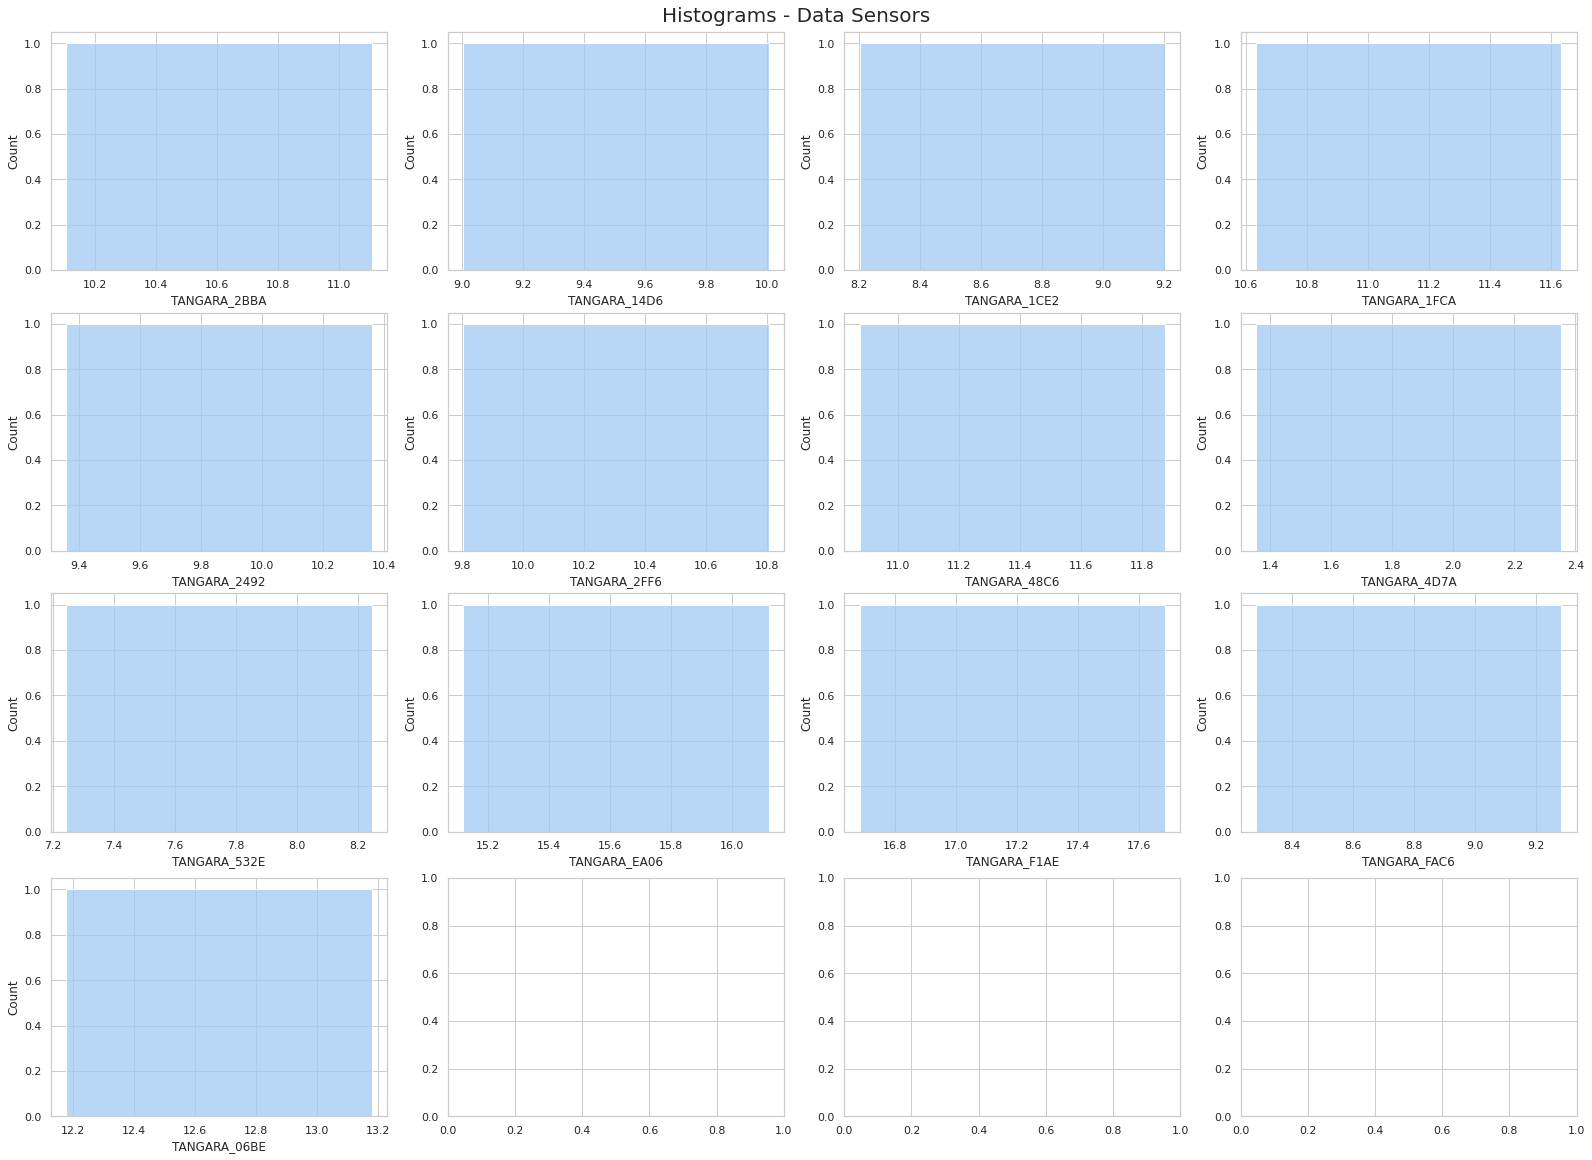

In [12]:
# Plot Histograms
aqi.histplots(pm25_last_24h)

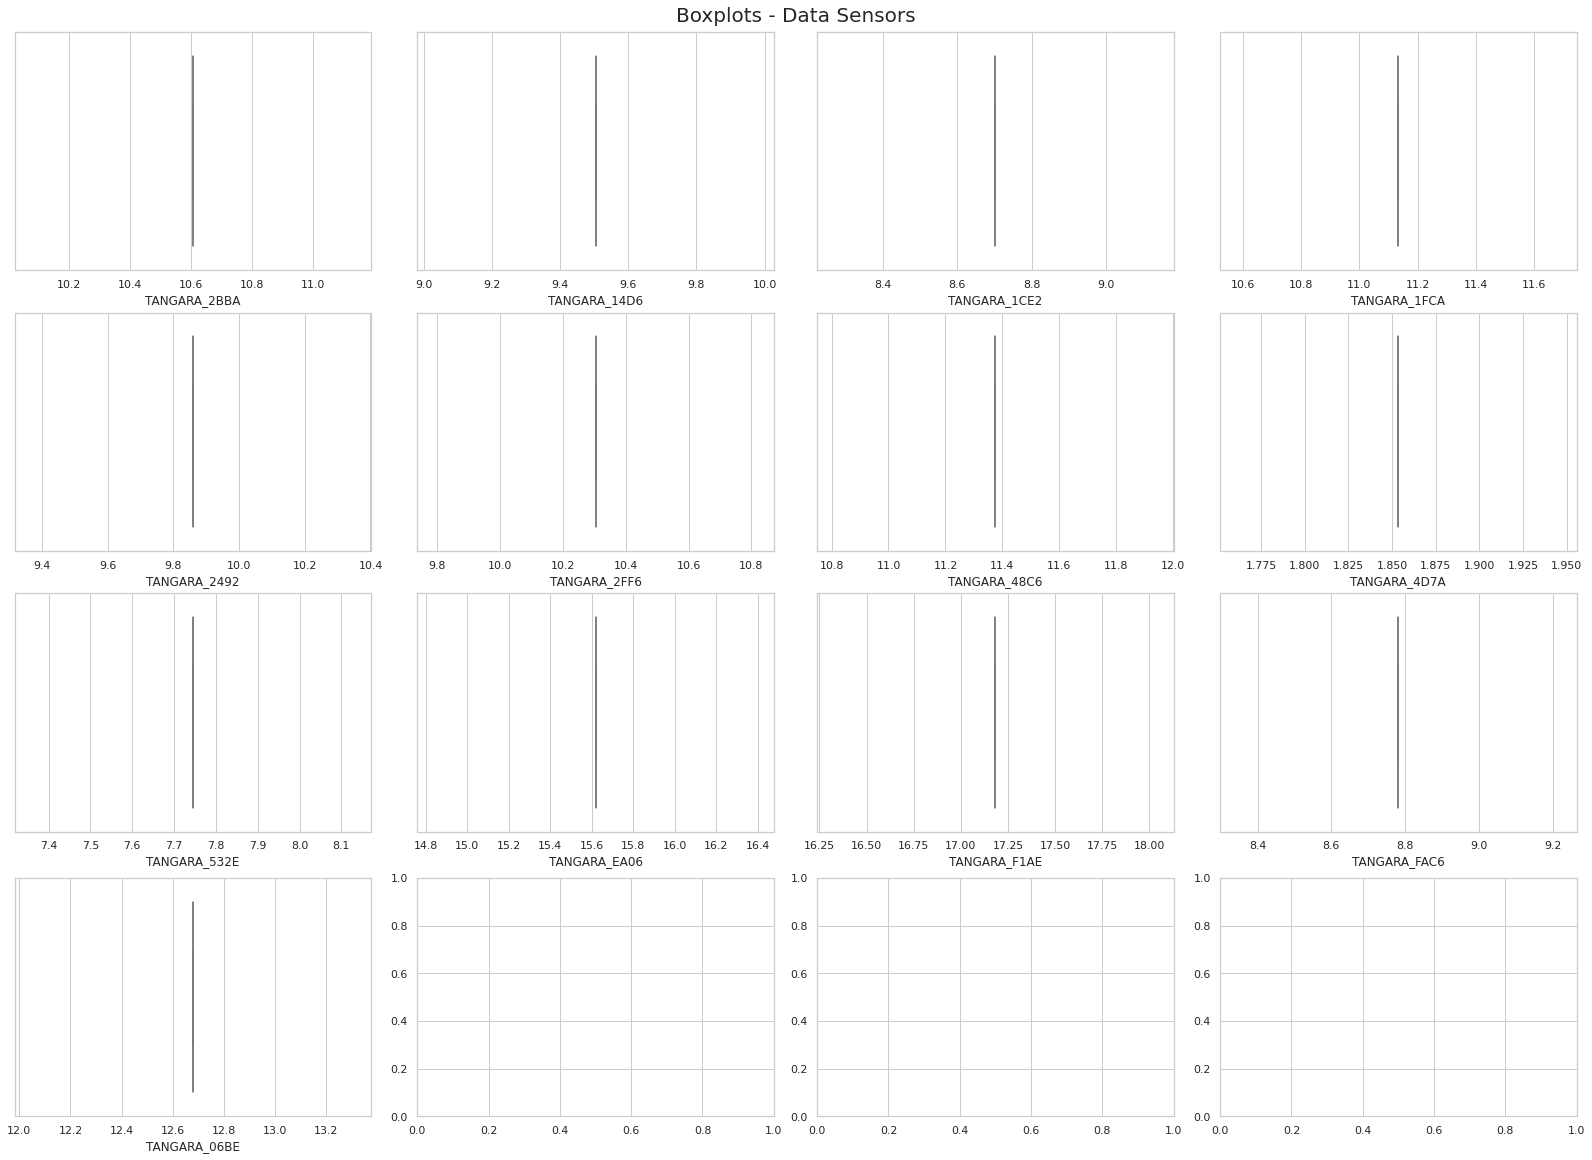

In [13]:
# Plot Boxplots
aqi.boxplots(pm25_last_24h)

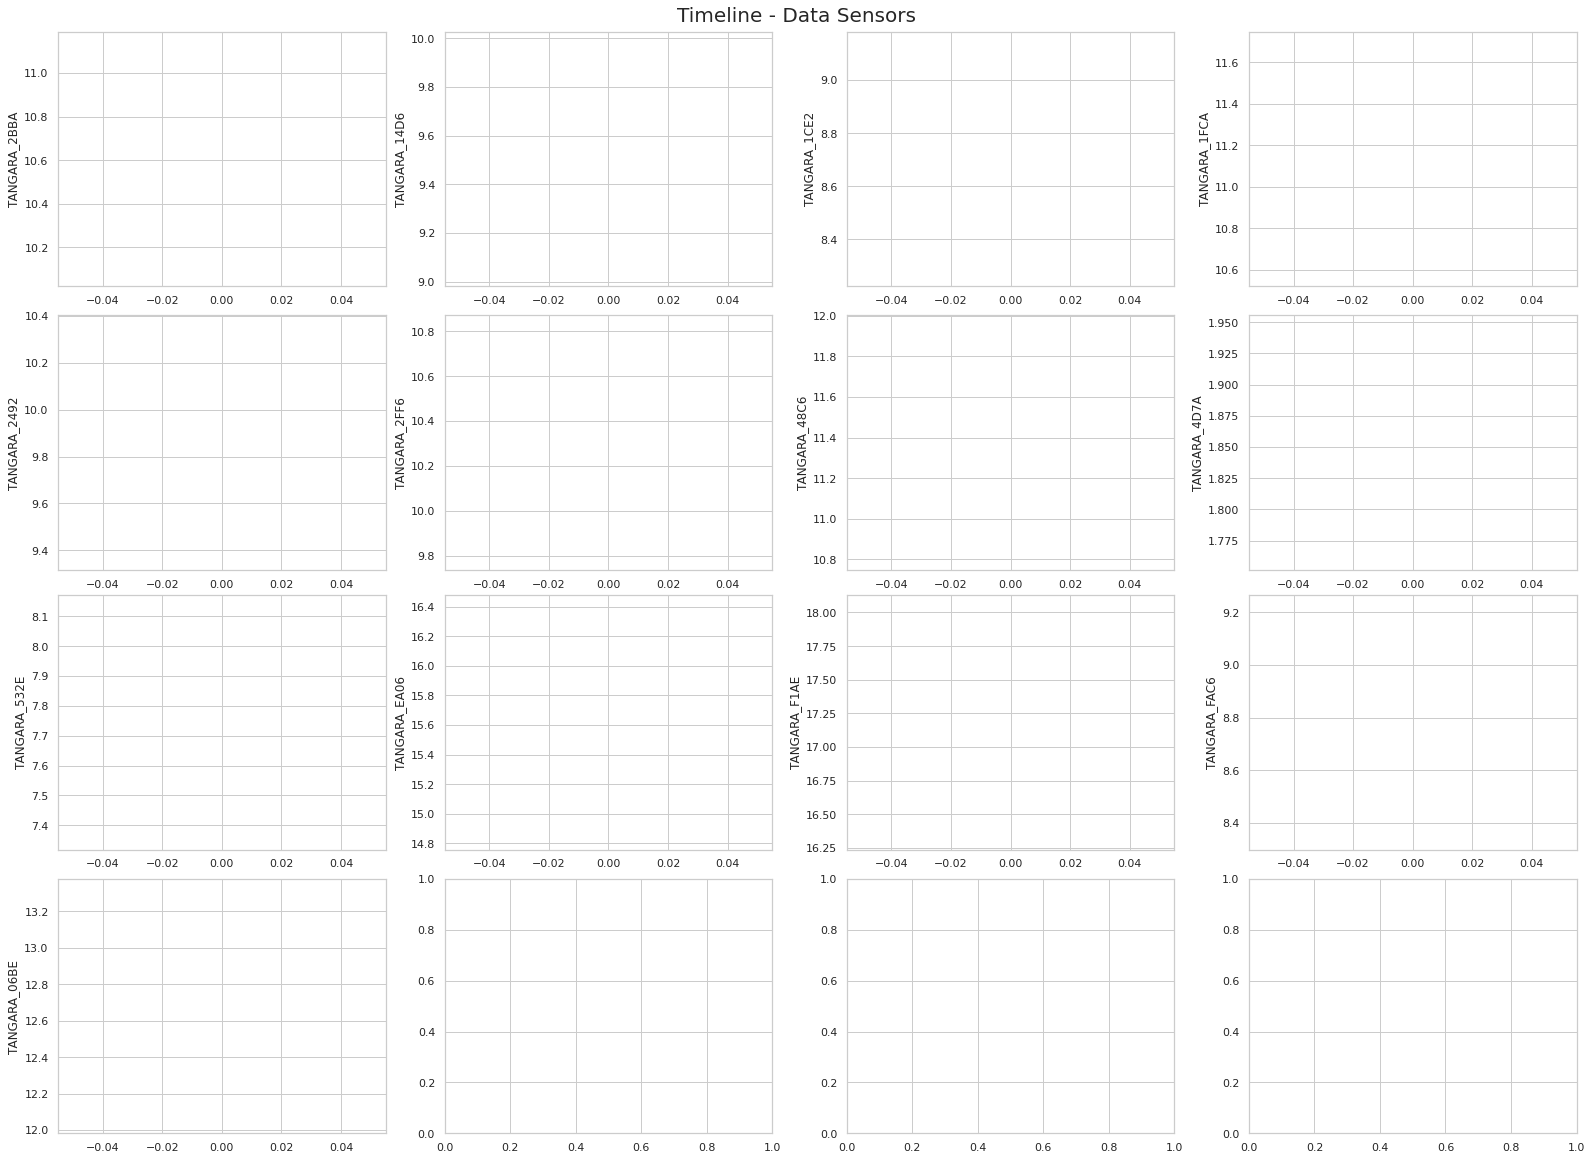

In [14]:
# Plot Lineplots
aqi.lineplots(pm25_last_24h)

In [15]:
# Save pm25_last_24h into Catalog
catalog.save('pm25_last_24h', pm25_last_24h)

2022-09-21 23:19:20,692 - kedro.io.data_catalog - INFO - Saving data to `pm25_last_24h` (CSVDataSet)...
